In [ ]:
import shap
import os
import contextlib
import tensorflow           as tf
import numpy                as np
import matplotlib.pyplot    as plt

In [2]:
# class labels
class_labels = {
    0 : 'cat',
    1 : 'dog',
}

In [3]:
# load testset
test_set = tf.data.Dataset.load('test_set')
test_set = test_set.shuffle(256)

2024-11-04 20:27:58.881992: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
from tools import SHAPExplainer

shap_explainer = SHAPExplainer()

## 1. Models with different feature extractors

In [5]:
model_extrcs = []
save_dir     = "models/diff_extrcs"

for model_file in os.listdir(save_dir):
    if model_file.endswith(".h5"):
        model_path = os.path.join(save_dir, model_file)
        model      = tf.keras.models.load_model(model_path)
        model_extrcs.append(model)

In [6]:
extrc_names = ["Xception", "InceptionV3", "DenseNet121", "ResNet50V2"]

for i, model in enumerate(model_extrcs):
    model._name = extrc_names[i]
    print(model.name)

Xception
InceptionV3
DenseNet121
ResNet50V2


In [5]:
import helper

# arrange in class order
samples = [helper.get_sample(i, test_set) for i in range(2)]

In [117]:
# filter out wrong predictions
preds_extrcs   = [helper.get_predictions(model_extrcs, sample_list[:100]) for sample_list in samples] # process only 100 instances
samples_extrcs = [helper.filter_correct_predictions(prediction) for prediction in preds_extrcs]

Wrong Prediction at index 37 by ResNet50V2: Predicted dog, True cat
Wrong Prediction at index 8 by Xception: Predicted cat, True dog
Wrong Prediction at index 78 by Xception: Predicted cat, True dog
Wrong Prediction at index 88 by InceptionV3: Predicted cat, True dog


In [118]:
for sample_list in samples_extrcs:
    print(len(sample_list))

99
97


In [ ]:
%%time
save_directory = 'SHAP Expls/diff_extrcs'

with open(os.devnull, 'w') as f:
    with contextlib.redirect_stdout(f):
        shap_explainer.generate_and_save_explanations(samples_extrcs, model_extrcs, save_directory)

## 2. Models with different optimizers

In [120]:
# load models
model_opts     = []
save_directory = 'models/diff_opts/'

for model_file in os.listdir(save_directory):
    if model_file.endswith('.h5'):
        model_path = os.path.join(save_directory, model_file)
        model      = tf.keras.models.load_model(model_path)
        model_opts.append(model)

In [121]:
# filter out wrong predictions
preds_opts   = [helper.get_predictions(model_opts, sample_list[:100]) for sample_list in samples] # process only 100 instances
samples_opts = [helper.filter_correct_predictions(prediction) for prediction in preds_opts]

Wrong Prediction at index 7 by DenseNet-SGD: Predicted dog, True cat
Wrong Prediction at index 28 by DenseNet-SGD: Predicted dog, True cat
Wrong Prediction at index 83 by DenseNet-Nadam: Predicted dog, True cat
Wrong Prediction at index 8 by DenseNet-Adam: Predicted cat, True dog
Wrong Prediction at index 88 by DenseNet-Adam: Predicted cat, True dog


### Generate SHAP explainations

In [ ]:
%%time
save_directory = 'SHAP Expls/diff_opts'

with open(os.devnull, 'w') as f:
    with contextlib.redirect_stdout(f):
        shap_explainer.generate_and_save_explanations(samples_opts, model_opts, save_directory)

## 3. Models with different weight initializations

In [6]:
# load models
model_seeds    = []
save_directory = "models/diff_seeds/"

for model_file in os.listdir(save_directory):
    if model_file.endswith(".h5"):
        model_path = os.path.join(save_directory, model_file)
        model      = tf.keras.models.load_model(model_path)
        model_seeds.append(model)

for i, model in enumerate(model_seeds):
    model._name = f'Dense{i+1}'
    print(model.name)

Dense1
Dense2
Dense3
Dense4
Dense5
Dense6
Dense7
Dense8
Dense9
Dense10


In [7]:
# filter out wrong predictions
preds_seeds   = [helper.get_predictions(model_seeds, sample_list[:100]) for sample_list in samples] # process only 100 instances
samples_seeds = [helper.filter_correct_predictions(prediction) for prediction in preds_seeds]

Wrong Prediction at index 32 by Dense9: Predicted dog, True cat
Wrong Prediction at index 13 by Dense2: Predicted cat, True dog
Wrong Prediction at index 22 by Dense1: Predicted cat, True dog
Wrong Prediction at index 40 by Dense2: Predicted cat, True dog
Wrong Prediction at index 89 by Dense3: Predicted cat, True dog


In [ ]:
%%time
save_directory = 'SHAP Expls/diff_seeds'

with open(os.devnull, 'w') as f:
    with contextlib.redirect_stdout(f):
        shap_explainer.generate_and_save_explanations(samples_seeds, model_seeds, save_directory)

In [22]:
import pickle
import shap
with open('SHAP Expls/diff_seeds/explain_cat_Dense1_shap.pkl', 'rb') as file:
    cat1_expl = pickle.load(file)

In [23]:
print(len(cat1_expl))

50


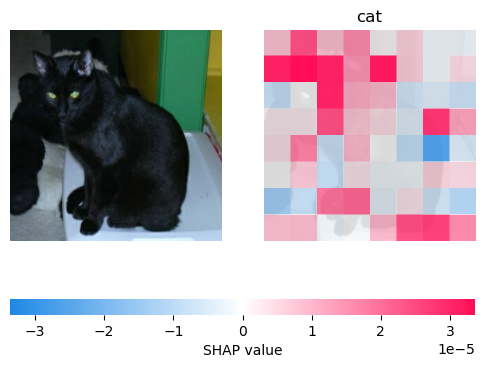

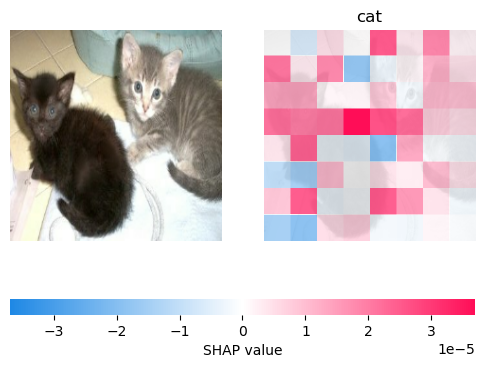

In [25]:
for expl in cat1_expl[:2]:
    shap.image_plot(expl)

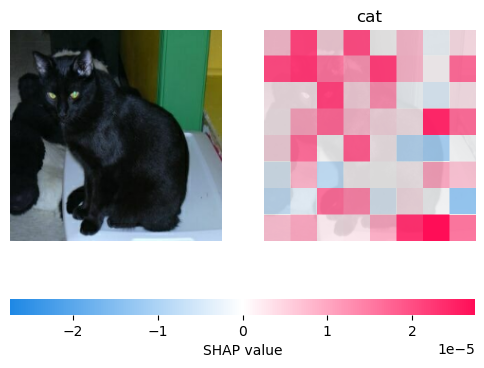

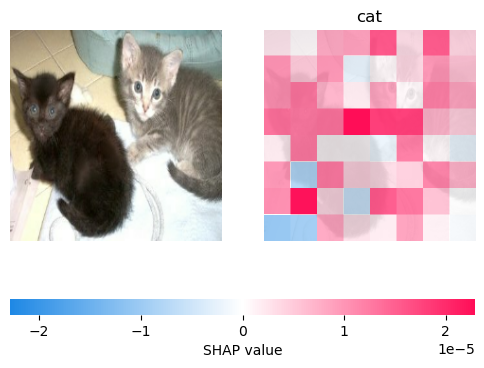

In [26]:
with open('SHAP Expls/diff_seeds/explain_cat_Dense2_shap.pkl', 'rb') as file:
    cat2_expl = pickle.load(file)

for expl in cat2_expl[:2]:
    shap.image_plot(expl)